In [33]:
#Deep Learning LSTM Trainging + TEST PART 
#HARROUZ MOUAD Faculty of Science and Technology MASTER2 ISICG 20208044
#Biyuzan  HAMZA Faculty of Science and Technology Master2 ISICG 20187435

import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten ,Conv2D,MaxPooling2D,BatchNormalization
import matplotlib.pyplot as plt 
from random import randrange
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import time




In [34]:
#Read File of test & training 
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [35]:
def plot_random(features,labels,numbers):
  for i in range (numbers):
    index=randrange(features.shape[0])
    plt.figure(figsize=(20,2))
    plt.imshow(features[index])
    plt.xlabel(classnames[int(labels[index])])

In [36]:
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

============= LOAD DATA =============
We have  :  (10000, 1)  paradigms of size :  (10000, 32, 32, 3)
Display Some exemples  : 


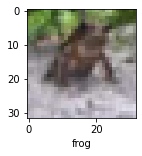

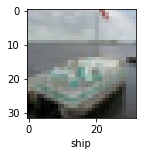

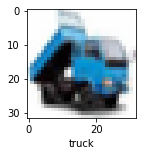

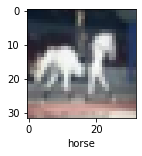

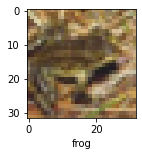

In [37]:
#Load data 
file= unpickle('InputData/data_batch_1')
#file_test=unpickle('test_batch')
#x_test=file_test[b'data']
x_train= file[b'data']
y_train= file[b'labels']
#y_test=file_test[b'labels']
#y_test=np.vstack(y_test)
y_train=np.vstack(y_train)
y_train_temp=y_train

x_train=np.dstack((x_train[:, :1024], x_train[:, 1024:2048], x_train[:, 2048:]))
x_train = x_train.reshape((x_train.shape[0], 32, 32, 3))
#x_test=np.dstack((x_test[:, :1024], x_test[:, 1024:2048], x_test[:, 2048:]))
#x_test = x_test.reshape((x_test.shape[0], 32, 32, 3))
print("============= LOAD DATA =============")
print("We have  : ", y_train.shape," paradigms of size : ",x_train.shape)
print("Display Some exemples  : ")
plot_random(x_train,y_train,5)

In [38]:
#Using One Hot encoding for label's part 

y_train=to_categorical(y_train,10)
#y_test=to_categorical(y_test,10)
print (" === Encoding output Done ===")

 === Encoding output Done ===


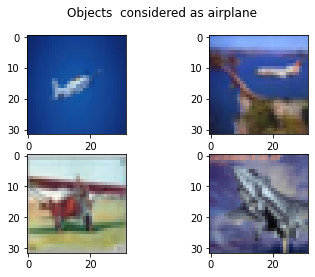

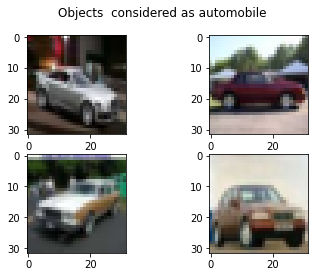

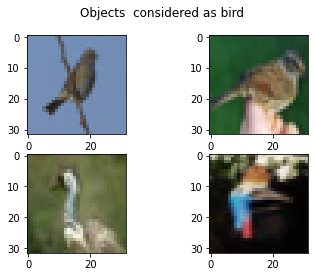

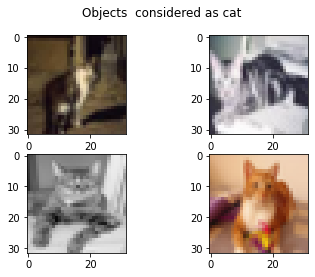

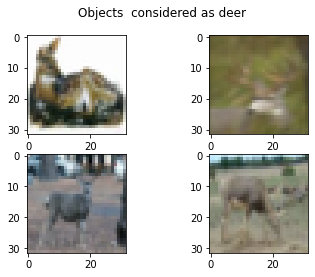

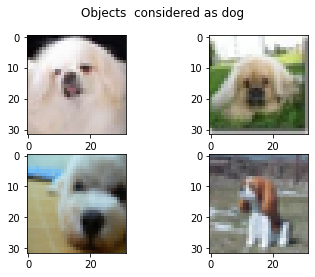

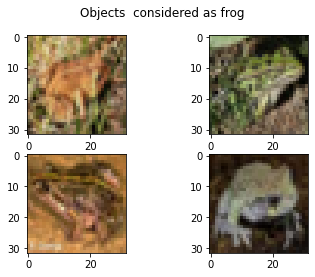

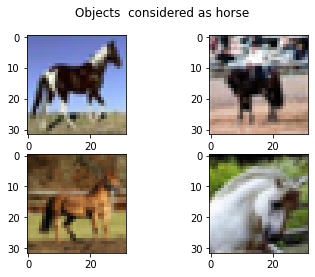

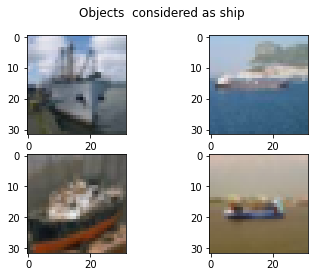

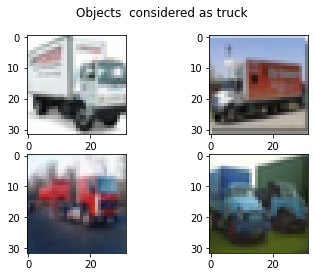

In [39]:
from random import randint

class_to_demonstrate = 0

while (sum(y_train_temp == class_to_demonstrate) > 4):
    tmp_idxs_to_use = np.where(y_train_temp == class_to_demonstrate)

    # create new plot window
    plt.figure()

    # plot 4 images as gray scale
    for j in range(4):
      index=randint(0, len(tmp_idxs_to_use[0]))
      plt.subplot(221+j)
      plt.imshow(x_train[tmp_idxs_to_use[0][index]])
      tmp_title = 'Objects  considered as ' + classnames[int(class_to_demonstrate)]
      plt.suptitle(tmp_title)
      plt.savefig("OutputData/"+str(classnames[int(class_to_demonstrate)])+str(time.time())+".png")

    # show the plot
    plt.show()
    
    plt.pause(2)

    # update the class to demonstrate index
    class_to_demonstrate = class_to_demonstrate + 1

In [40]:
#Normalization of input using min & max 
x_train = x_train.astype('float32')
#x_test=x_test.astype('float32')
# normalization's results gonna be between 0 & 1 
x_train=x_train/255.0
#x_test=x_test/255.0
print (" === Normalization Input  Done ===")

 === Normalization Input  Done ===


In [41]:
#First model
"""
print(" === Creation of convolution ===")
model = Sequential()
#Convolution part & feature extraction 
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
print(" === Creation done ===")
"""

'\nprint(" === Creation of convolution ===")\nmodel = Sequential()\n#Convolution part & feature extraction \nmodel.add(Conv2D(32,kernel_size=(3,3),activation=\'relu\',kernel_initializer=\'he_uniform\',padding=\'same\',input_shape=(32,32,3)))\nmodel.add(BatchNormalization())\nmodel.add(Conv2D(32,kernel_size=(3,3),activation=\'relu\',kernel_initializer=\'he_uniform\',padding=\'same\'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(64,kernel_size=(3,3),activation=\'relu\',kernel_initializer=\'he_uniform\',padding=\'same\'))\nmodel.add(BatchNormalization())\nmodel.add(Conv2D(64,kernel_size=(3,3),activation=\'relu\',kernel_initializer=\'he_uniform\',padding=\'same\'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.3))\n\nmodel.add(Conv2D(128,kernel_size=(3,3),activation=\'relu\',kernel_initializer=\'he_uniform\',padding=\'same\'))\nmodel.add(BatchNormalization())\nmodel

In [42]:
#second model
"""
print(" === Creation of convolution ===")
model = Sequential()
model.add(Conv2D(96,kernel_size=(5,5),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(80,kernel_size=(5,5),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(96,kernel_size=(5,5),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,kernel_size=(5,5),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
print(" === Creation done ===")
"""

'\nprint(" === Creation of convolution ===")\nmodel = Sequential()\nmodel.add(Conv2D(96,kernel_size=(5,5),activation=\'relu\',kernel_initializer=\'he_uniform\',padding=\'same\',input_shape=(32,32,3)))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Conv2D(80,kernel_size=(5,5),activation=\'relu\',kernel_initializer=\'he_uniform\',padding=\'same\'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Conv2D(96,kernel_size=(5,5),activation=\'relu\',kernel_initializer=\'he_uniform\',padding=\'same\'))\nmodel.add(Conv2D(64,kernel_size=(5,5),activation=\'relu\',kernel_initializer=\'he_uniform\',padding=\'same\'))\nmodel.add(Dropout(0.4))\nmodel.add(Flatten())\nmodel.add(Dense(256,activation=\'relu\',kernel_initializer=\'he_uniform\'))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.5))\nmodel.add(Dense(10,activation=\'softmax\'))\nprint(" === Creation done ===")\n'

In [43]:
#third model
print(" === Creation of convolution ===")
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
print(" === Creation of done ===")

 === Creation of convolution ===
 === Creation of done ===


In [44]:
#NN Part
print(" === Creation of model ===")
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
print(" === Creation of Done ===")
print(" === Architecture of model ===")
model.summary()

 === Creation of model ===
 === Creation of Done ===
 === Architecture of model ===
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                

In [45]:
#Hyper parametre & compiling model 
'''
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name='adam',),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
'''

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
           

In [46]:

#fit model 
print("=== Learning Phase ===")
#delete comment to train without data augmentation 
#history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2, verbose=1)
print("=== Learning Done ===")

=== Learning Phase ===
=== Learning Done ===


In [47]:
#DATA AUGEMENTATION TO PROVIDE BETTER RESULTS
x_val=x_train[:1000]
y_val=y_train[:1000]

x_train=x_train[1000:]
y_train=y_train[1000:]
y_train_temp=y_train

# training using Data augementation
dataAugmentation= ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,shear_range=0.2,
    zoom_range=0.2)

generatordata=dataAugmentation.flow(x_train,y_train,batch_size=32)
history=model.fit_generator(generatordata,steps_per_epoch=x_train.shape[0]//32,epochs=200,validation_data=(x_val,y_val), verbose=1)


Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


281/281 [==============================] - 24s 24ms/step - loss: 2.3381 - accuracy: 0.1611 - val_loss: 2.7141 - val_accuracy: 0.1190
Epoch 2/300
281/281 [==============================] - 7s 23ms/step - loss: 2.0674 - accuracy: 0.2144 - val_loss: 1.9873 - val_accuracy: 0.2760
Epoch 3/300
281/281 [==============================] - 7s 23ms/step - loss: 1.9440 - accuracy: 0.2550 - val_loss: 1.8469 - val_accuracy: 0.2960
Epoch 4/300
281/281 [==============================] - 7s 23ms/step - loss: 1.8914 - accuracy: 0.2848 - val_loss: 1.7032 - val_accuracy: 0.3300
Epoch 5/300
281/281 [==============================] - 7s 24ms/step - loss: 1.8168 - accuracy: 0.3134 - val_loss: 1.6581 - val_accuracy: 0.3740
Epoch 6/300
281/281 [==============================] - 7s 23ms/step - loss: 1.7697 - accuracy: 0.3363 - val_loss: 1.7394 - val_accuracy: 0.3840
Epoch 7/300
281/281 [==============================] - 6s 23ms/step - loss: 1.6975 - accuracy: 0.3669 - val_loss: 1.5272 - val_accuracy: 0.4160
Epo

KeyboardInterrupt: ignored

In [ ]:
#Draw Results 
#accurcy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig("OutputData/AccurcyGraph.png")
#loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.savefig("OutputData/LossGraph.png")


In [ ]:
#Saving model 
print("Saving Model ...")
model_name = 'OutputData/CIFARE'+str(time.time())+'.h5'
model.save(model_name)
print ("=== Model saved === ")

In [ ]:

#score = model.evaluate(x_test, y_test, verbose=1)
#print(score)

In [ ]:
"""
test_preds = model.predict(x_test)
pred_classes = np.argmax(test_preds, axis=1)
""""

In [ ]:
"""
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()
real_class=np.argmax(y_test, axis=1)

for i in range( 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (pred_classes[i], real_class[i]))  
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

"""

In [ ]:
#all metrics 
"""
from sklearn.metrics import classification_report
print(classification_report(real_class,pred_classes))
"""

In [ ]:
#Confusion Matrix 
"""
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
Matrix_confusion = confusion_matrix(real_class,pred_classes)
plot=ConfusionMatrixDisplay(Matrix_confusion,display_labels=classnames)
plt.figure(figsize=(12,12))
_,axe=plt.subplots(figsize=(12,12))
plot.plot(cmap=plt.cm.Blues,ax=axe)
plt.show()
"""